# Team 4 Project
# Tyler Kawka, Trevor Moos, Brandon Shaw
# November 17 2020

# Overview

For our project we will be looking at the heart disease UCI dataset which contains information about patient health information and test results and whether or not that person has heart disease or not. There are a total of 14 attributes.

 In this project we will be conducting multiple types of classification models in the hopes of attempting to be able to classify and predict whether or not someone will have heart disease based on their bodily test results and current symptoms.
 
  This is a very releveant and interesting dataset and topic and is the reason we chose to use this dataset because being able to predict health issues is very important as if we are able to determine whether or not someone might have heart disease based on ceratin characteristics of their health, we might be able to prevent heart disease in the future by working to make sure people keep certain health features under control.
  
   Our goal with these models will be to see which classification modeling technique gives us the highest accuracy results on predict whether the person had heart disease or not based on our predictor vvariables. Normal checks on the dataset will be performed to ensure we are working on a fair and balanced dataset that will not give us a false accuracy score simply due to low sample sizes. 
   
   We also found this topic particularly interesting in the current day in age with COVID raging across the country, so we decided to focus on the health field and show how data science can be used for scientific and health purposes in the hopes of reducing heart disease by focusing on predictor variables that contribute the most to this heart disease predictions. 
   
   Information on the dataset can be found at the reference below. We will also try and oversample the positive target to ensure that we receive as low of a false negative rate as we can, as we would much rather have false positives in this sort of data compared to classifying someone as not having heart disease when in reality they do.

References:

https://www.kaggle.com/ronitf/heart-disease-uci


# Data


The following dataset can be found at the link above and after downloading the dataset at the webpage. 

The original dataset originally contained 76 attributes, but all the ones used for research purposes and by ML researchers used a subset of 14 of them and this is the dataset that is provided at the webpage. There are a total of 303 samples included in the datset. 

The attributes include 13 predictor variables and the last one is the target variable which is either a 0 or 1 indicating if some does not have heart disease or if they do (0 is they don't, 1 means they do). 

Some examples of the predictor variables are things like age, sex, chest pain type, resting blood pressure, etc. which all represents different factors that might contribute to someone having heart disease or not, and our goal will be to predict based on these variables whether or not the person did have heart disease so that we can possibly predict whther or not someone does or does not have heart disease in the future based on a few of these health features. 

We first must examine the data and ensure it is clean and ready to be used in our modeling techniques before even beggining to model them, looking at things like null value checks and sampling distributions of the data to ensure everything is fairly well balanced. 

Once the data has been cleaned, we will then perform a wide range of classification models on the data from simple ones to more complex ones like stacking models. We will also perform the same models on a dataset created through feature selection on the original dataset. 

We will then gather the results from these models and compare them against one another (our main focus will be on low false negatives ) to determine which model was best able to predict the prescence of heart disease in the patient and which dataset provided better results from these models.


In [ ]:
# Importing libraries to be used for modeling and EDA

import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn import model_selection
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from mlxtend.classifier import StackingClassifier
from sklearn.metrics import accuracy_score
from scipy import interp
from sklearn import preprocessing
from sklearn.metrics import roc_curve, auc
from google.colab import files
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [ ]:
# uploading csv file to be used in dataset, make sure to have dataset ready on computer to load in
uploaded = files.upload()

Saving heart.csv to heart.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['heart.csv']))
# loading data into dataframe to be used 

#EDA

##### Null value and dimensionality check

In [ ]:
#Checking to see if data has any null values to take care of, none found in this data so we are good to continue
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Check the data types

In [ ]:
#Getting dimensionality of dataset, 303 rows and 14 columns, one of which is our target variable
#Matches up with what we said above
df.shape

(303, 14)

##### Checking layout of data

In [ ]:
# Getting a visual of rows of dataset, as we can see all the 1 target variables are first followed by all the 0s next, we will need to shuffle the rows
# to ensure a proper model is able to be built.
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


##### Shuffling data

In [ ]:
#Shuffled dataset, targets are mixed around and now all in order, ensures a proper model can be built
df = df.sample(frac=1)
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
56,48,1,0,122,222,0,0,186,0,0.0,2,0,2,1
108,50,0,1,120,244,0,1,162,0,1.1,2,0,2,1
193,60,1,0,145,282,0,0,142,1,2.8,1,2,3,0
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
86,68,1,2,118,277,0,1,151,0,1.0,2,1,3,1
144,76,0,2,140,197,0,2,116,0,1.1,1,0,2,1
191,58,1,0,128,216,0,0,131,1,2.2,1,3,3,0
46,44,1,2,140,235,0,0,180,0,0.0,2,0,2,1
260,66,0,0,178,228,1,1,165,1,1.0,1,2,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0


##### Checking sampling distributions of data

In [ ]:
# Get startistical summary of variables, can see mean for target is slightly above 0.5, means we have slightly more samples of people having
# heart disease verus not having it, variable distributions are all over the place, will consider normalizing to bring to same range
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Looking at potential collinearity between the variables.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: vmin, vmax. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


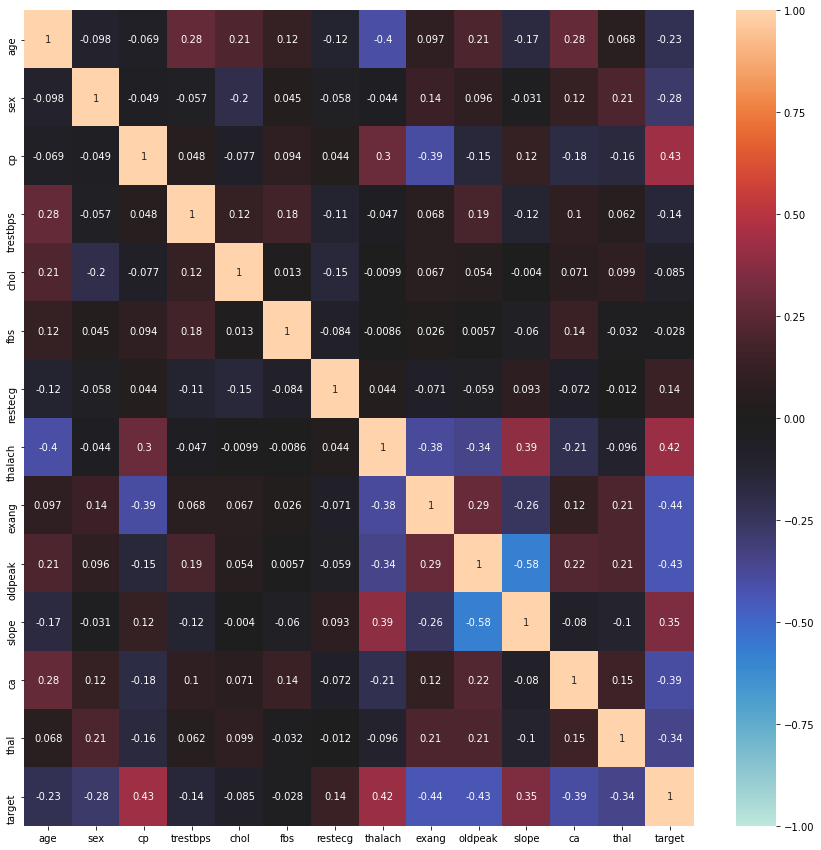

In [ ]:
#checking to see correlation between variables and if there is an issue with potential colinearity between the variables
import seaborn as sns
fig, ax = plt.subplots(figsize=(15,15))
corrmat = df.corr()
sns.heatmap(corrmat,-1,1,ax=ax,center=0,annot=True);
#we can see the highest correlation is ~.5 which is decent, but not cause for concern surrounding collinearity between the variables.

##### Checking Distribution of Target Variable

In [ ]:
# Check to see if the dataset is imbalanced, and if so by how much
# can see results are similar to what was described above, slightly more samples where
# person has heart disease compared to not having heart disease

class1 = len(df[df['target']== 0])
class2 = len(df[df['target']== 1])

print("No heart disease Occurances: " + str(class1))
print("Heart Disease Occurances: " + str(class2))

No heart disease Occurances: 138
Heart Disease Occurances: 165


No Heart Disease:  138
Heart Disease:  165


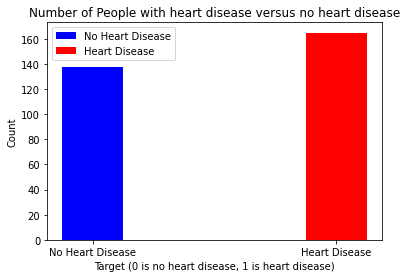

In [ ]:
# Looking at sampling distribution for the target variable to make sure data is balanced, can see slightly more people with heart disease
# but not large enough difference to be a cause for concern
%matplotlib inline
import matplotlib.pyplot as plt

No_heart_disease = sum(df['target'] == 0)
Heart_disease = sum(df['target'] == 1)

plt.bar('No Heart Disease', No_heart_disease, color = 'b', width = 0.25, label='No Heart Disease')
plt.bar('Heart Disease', Heart_disease, color = 'r', width = 0.25, label='Heart Disease')

print("No Heart Disease: ",No_heart_disease)
print("Heart Disease: ", Heart_disease)

plt.title("Number of People with heart disease versus no heart disease")
plt.xlabel("Target (0 is no heart disease, 1 is heart disease)")
plt.ylabel("Count")
plt.legend()

##### Looking at distribution of sex variable

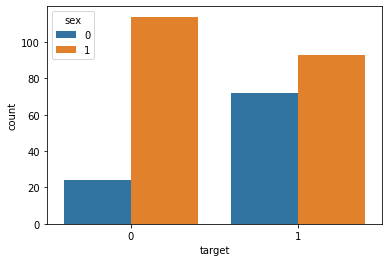

In [ ]:
# Looking at sex and presence of heart disease between male and females
# we can see two things frmo this visual, one that there are more males present in the dataset
# and also women in this data are much more likely to have heart disease than men, likely would mean it is a good 
# predictor variable to leave in 
import seaborn as sns
sns.countplot(x='target',hue='sex',data=df)

##### Looking at distribution of age variable

Young  : 16
Middle : 128
Elderly : 159


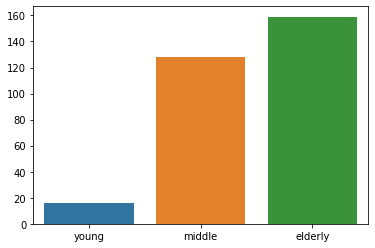

In [ ]:
# Looking at distribution of ages, consider middle age to be 40 according to online resources so that's where we break our brackets up
young = df[(df.age>=0) & (df.age <40)]
middle = df[(df.age>=40)& (df.age <55)]
elderly = df[(df.age>=55)]
sns.barplot(x=['young','middle','elderly'],y=[len(young),len(middle),len(elderly)])
print ("Young  :" , len(young))
print ("Middle :" , len(middle))
print ("Elderly :" , len(elderly))

In [ ]:
#Looking to see what the youngest ages we have are, doesn't seem too young but just something to be aware of
young.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
115,37,0,2,120,215,0,1,170,0,0.0,2,0,2,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
239,35,1,0,126,282,0,0,156,1,0.0,2,0,3,0
65,35,0,0,138,183,0,1,182,0,1.4,2,0,2,1
157,35,1,1,122,192,0,1,174,0,0.0,2,0,2,1


##### Dummy Variables

In [ ]:
#List of all categorical variables, need to turn them into dummy variables to be used and then scale them
from pandas import get_dummies
categorical = ['sex','cp','fbs','restecg','exang','slope','ca','thal']
new_df = pd.get_dummies(df, columns=categorical)
new_df.head(10)

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
56,48,122,222,186,0.0,1,0,1,1,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
108,50,120,244,162,1.1,1,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
193,60,145,282,142,2.8,0,0,1,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1
296,63,124,197,136,0.0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0
86,68,118,277,151,1.0,1,0,1,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1
144,76,140,197,116,1.1,1,1,0,0,0,1,0,1,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,1,0
191,58,128,216,131,2.2,0,0,1,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1
46,44,140,235,180,0.0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
260,66,178,228,165,1.0,0,1,0,1,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1
300,68,144,193,141,3.4,0,0,1,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1


In [ ]:
X = new_df.drop(['target'],axis=1)
y = new_df['target']

##### Forward-Backward Feature Selection

In [ ]:

import statsmodels.api as sm
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
#            best_feature = new_pval.argmin()
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            try:
              included.remove(worst_feature)
            except:
              pass
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

result = stepwise_selection(X, y)

print('resulting features:')
print(result)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


Add  thal_2                         with p-value 4.35622e-23
Add  cp_0                           with p-value 4.23749e-14
Add  ca_0                           with p-value 9.40202e-12
Add  slope_2                        with p-value 1.30048e-05
Add  sex_1                          with p-value 0.00391757
Add  sex_0                          with p-value 5.41937e-07
Drop                              4 with p-value 0.122629
Add  oldpeak                        with p-value 0.00662818
resulting features:
['thal_2', 'cp_0', 'ca_0', 'slope_2', 'sex_1', 'sex_0', 'oldpeak']


In [ ]:
from sklearn.model_selection import train_test_split
#Getting new dataset with features that were selected to be significant, any feature that had a score under 0.05
imp_df = new_df[['thal_2', 'cp_0', 'ca_0', 'slope_2', 'sex_0', 'oldpeak', 'sex_1','target']]
X2 = imp_df.drop('target',axis=1)
y2 = imp_df['target']train_test_split(X2, y2, test_size = 0.20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
X2_train, X2_test, y2_train, y2_test = 

In [ ]:
# Standardize data so continuous variables aren't over weighted for importance
# Info on how to perform on training and testing found here : https://datascience.stackexchange.com/questions/38395/standardscaler-before-and-after-splitting-data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scal = sc.fit_transform(X_train)
X_test_scal = sc.transform(X_test)
X_train_scal2 = sc.fit_transform(X2_train)
X_test_scal2 = sc.transform(X2_test)


# Models

In this section we will create and test our classification models. Many models will be used such as Logistic Regression, kNN, Random Forest,SVC, and stacking.We will run these 5 models against our base dataset as well as our feature importance dataset to compare which one overall provided better results. We will also look at AOC curves and Confusion Matrices to determine how we are doing in terms of reducing False Negatives as much as possible. Our evalutation of the models will come down to a combination of the highest accuracy, auc scores as well as the lowest amount of false negatives. 

##### Logistic Regression Base Model

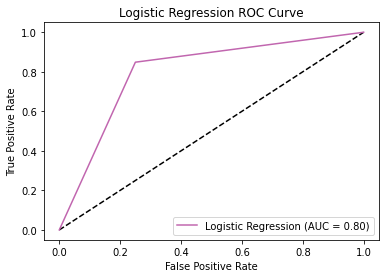

In [ ]:

from sklearn.metrics import roc_curve, auc
names1 = []
names2 = []
accuracy = []
accuracy2 = []
err = []
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train_scal,y_train)
y_pred = lr.predict(X_test_scal)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
label='%s (AUC = %0.2f)' % ("Logistic Regression", roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label=label, color=np.random.rand(3))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.legend(loc="lower right")
plt.show()

##### Logistic Regression Base Accuracy and Confusion Matrix

In [ ]:
#Accuracy score for our logistic regression model
score = lr.score(X_test_scal, y_test)
print(score)
accuracy.append((score,"Logistic Regression Base"))
names1.append(score)

0.8032786885245902


In [ ]:
#Very low amount of false negatives, which is exactly what we want to see, would much rather have false positives
#compared to false negatives for this type of data
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[21,  7],
       [ 5, 28]])

##### Logistic Regression With Feature Importance

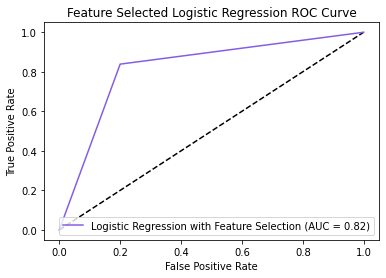

In [ ]:
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train_scal2,y2_train)
y_pred = lr.predict(X_test_scal2)
fpr, tpr, thresholds = roc_curve(y2_test, y_pred)
roc_auc = auc(fpr, tpr)
label='%s (AUC = %0.2f)' % ("Logistic Regression with Feature Selection", roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label=label, color=np.random.rand(3))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Feature Selected Logistic Regression ROC Curve')
plt.legend(loc="lower right")
plt.show()

##### Logistic Regression Feature Importance Accuracy and Confusion Matrix

In [ ]:
#Accuracy score for our logistic regression model
score2 = lr.score(X_test_scal2, y2_test)
print(score2)
accuracy2.append((score2,"Logistic Regression with feature importance"))
names2.append(score2)

0.819672131147541


In [ ]:
confusion_matrix(y2_test,y_pred)

array([[24,  6],
       [ 5, 26]])

##### Random Forest Base Model

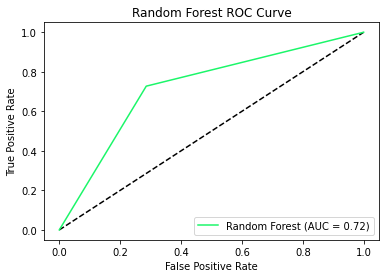

In [ ]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train_scal,y_train)
y_pred2 = rf.predict(X_test_scal)
fpr2, tpr2, thresholds = roc_curve(y_test, y_pred2)
roc_auc2 = auc(fpr2, tpr2)
label2='%s (AUC = %0.2f)' % ("Random Forest", roc_auc2)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr2, tpr2, label=label2, color=np.random.rand(3))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.legend(loc="lower right")
plt.show()

##### Random Forest Base Accuracy and Confusion Matrix

In [ ]:
score3 = rf.score(X_test_scal, y_test)
print(score3)
accuracy.append((score3,"Random Forest Base"))
names1.append(score3)

0.7213114754098361


In [ ]:
confusion_matrix(y_test,y_pred2)

array([[20,  8],
       [ 9, 24]])

##### Random Forest with Feature Importance 

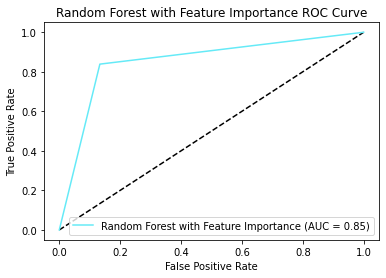

In [ ]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train_scal2,y2_train)
y_pred2 = rf.predict(X_test_scal2)
fpr2, tpr2, thresholds = roc_curve(y2_test, y_pred2)
roc_auc2 = auc(fpr2, tpr2)
label2='%s (AUC = %0.2f)' % ("Random Forest with Feature Importance", roc_auc2)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr2, tpr2, label=label2, color=np.random.rand(3))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest with Feature Importance ROC Curve')
plt.legend(loc="lower right")
plt.show()

##### Random Forest Accuracy and Confusion Matrix

In [ ]:
score4 = rf.score(X_test_scal2, y2_test)
print(score4)
accuracy2.append((score4,"Random Forest with feature importance"))
names2.append(score4)

0.8524590163934426


In [ ]:
confusion_matrix(y2_test,y_pred2)


array([[26,  4],
       [ 5, 26]])

##### KNN Base Model

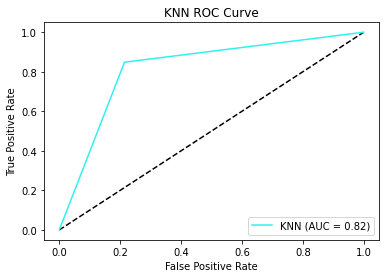

In [ ]:
kn = KNeighborsClassifier()
kn.fit(X_train_scal,y_train)
y_pred3 = kn.predict(X_test_scal)
fpr3, tpr3, thresholds = roc_curve(y_test, y_pred3)
roc_auc3 = auc(fpr3, tpr3)
label3='%s (AUC = %0.2f)' % ("KNN", roc_auc3)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr3, tpr3, label=label3, color=np.random.rand(3))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN ROC Curve')
plt.legend(loc="lower right")
plt.show()

##### KNN Base Accuracy and Confusion Matrix

In [ ]:
#Accuracy score for our logistic regression model
score5 = kn.score(X_test_scal, y_test)
print(score5)
accuracy.append((score5,"KNN Base"))
names1.append(score5)

0.819672131147541


In [ ]:
confusion_matrix(y_test,y_pred3)

array([[22,  6],
       [ 5, 28]])

##### KNN with Feature Importance

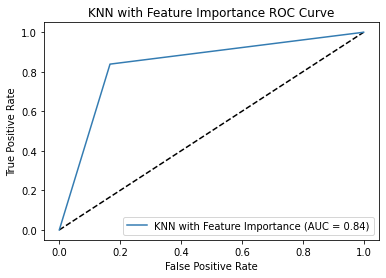

In [ ]:
kn = KNeighborsClassifier()
kn.fit(X_train_scal2,y2_train)
y_pred3 = kn.predict(X_test_scal2)
fpr3, tpr3, thresholds = roc_curve(y2_test, y_pred3)
roc_auc3 = auc(fpr3, tpr3)
label3='%s (AUC = %0.2f)' % ("KNN with Feature Importance", roc_auc3)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr3, tpr3, label=label3, color=np.random.rand(3))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN with Feature Importance ROC Curve')
plt.legend(loc="lower right")
plt.show()

##### KNN with Feature Importance Accuracy and Confusion Matrix

In [ ]:
score6 = kn.score(X_test_scal2, y2_test)
print(score6)
accuracy2.append((score6,"KNN with feature importance"))
names2.append(score6)

0.8360655737704918


In [ ]:
confusion_matrix(y2_test,y_pred3)

array([[25,  5],
       [ 5, 26]])

##### SVC Base Model

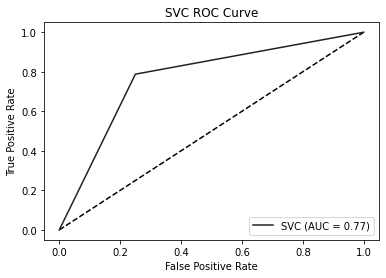

In [ ]:
svc = SVC(kernel='rbf')
svc.fit(X_train_scal,y_train)
y_pred4 = svc.predict(X_test_scal)
fpr4, tpr4, thresholds = roc_curve(y_test, y_pred4)
roc_auc4 = auc(fpr4, tpr4)
label4='%s (AUC = %0.2f)' % ("SVC", roc_auc4)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr4, tpr4, label=label4, color=np.random.rand(3))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVC ROC Curve')
plt.legend(loc="lower right")
plt.show()

##### SVC Base Accuracy and Confusion Matrix

In [ ]:

score7 = svc.score(X_test_scal, y_test)
print(score7)
accuracy.append((score7,"SVC Base"))
names1.append(score7)

0.7704918032786885


In [ ]:
confusion_matrix(y_test,y_pred4)

array([[21,  7],
       [ 7, 26]])

##### SVC with Feature Importance

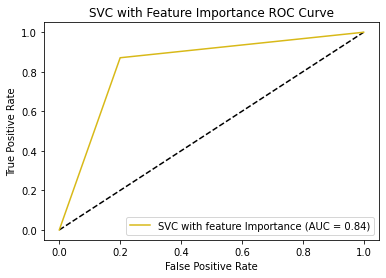

In [ ]:
svc = SVC(kernel='rbf')
svc.fit(X_train_scal2,y2_train)
y_pred4 = svc.predict(X_test_scal2)
fpr4, tpr4, thresholds = roc_curve(y2_test, y_pred4)
roc_auc4 = auc(fpr4, tpr4)
label4='%s (AUC = %0.2f)' % ("SVC with feature Importance", roc_auc4)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr4, tpr4, label=label4, color=np.random.rand(3))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVC with Feature Importance ROC Curve')
plt.legend(loc="lower right")
plt.show()

##### SVC with Feature Importance Accuracy and Confusion Matrix

In [ ]:
score8 = svc.score(X_test_scal2, y2_test)
print(score8)
accuracy2.append((score8,"SVC with feature importance"))
names2.append(score8)

0.8360655737704918


In [ ]:
confusion_matrix(y2_test,y_pred4)

array([[24,  6],
       [ 4, 27]])

##### Stacking Base Model

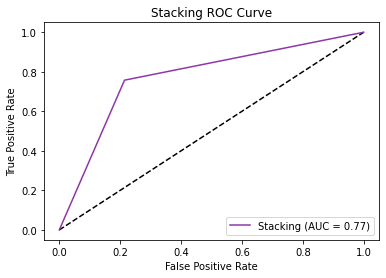

In [ ]:
lr_clf = LogisticRegression(C=30000, penalty='l2',  multi_class='multinomial',solver='newton-cg')
sclf = StackingClassifier(classifiers=[lr, rf,kn, svc,], meta_classifier=lr_clf)
sclf.fit(X_train_scal,y_train)
y_pred5 = sclf.predict(X_test_scal)
fpr5, tpr5, thresholds = roc_curve(y_test, y_pred5)
roc_auc5 = auc(fpr5, tpr5)
label5='%s (AUC = %0.2f)' % ("Stacking", roc_auc5)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr5, tpr5, label=label5, color=np.random.rand(3))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Stacking ROC Curve')
plt.legend(loc="lower right")
plt.show()

##### Stacking Base Accuracy and Confusion Matrix

In [ ]:
score9 = sclf.score(X_test_scal, y_test)
print(score9)
accuracy.append((score9,"Stacking Base"))
names1.append(score9)

0.7704918032786885


In [ ]:
confusion_matrix(y_test,y_pred5)

array([[22,  6],
       [ 8, 25]])

##### Stacking with Feature Importance

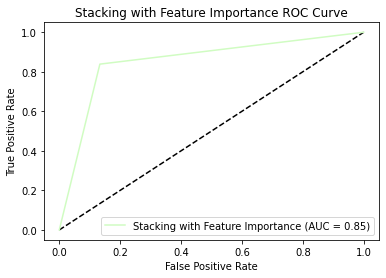

In [ ]:
lr_clf = LogisticRegression(C=30000, penalty='l2',  multi_class='multinomial',solver='newton-cg')
sclf = StackingClassifier(classifiers=[lr, rf,kn, svc,], meta_classifier=lr_clf)
sclf.fit(X_train_scal2,y2_train)
y_pred5 = sclf.predict(X_test_scal2)
fpr5, tpr5, thresholds = roc_curve(y2_test, y_pred5)
roc_auc5 = auc(fpr5, tpr5)
label5='%s (AUC = %0.2f)' % ("Stacking with Feature Importance", roc_auc5)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr5, tpr5, label=label5, color=np.random.rand(3))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Stacking with Feature Importance ROC Curve')
plt.legend(loc="lower right")
plt.show()

##### Stacking with Feature Importance Accuracy and Confusion Matrix

In [ ]:
score10 = sclf.score(X_test_scal2, y2_test)
print(score10)
accuracy2.append((score10,"Stacking with feature importance"))
names2.append(score10)

0.8524590163934426


In [ ]:
confusion_matrix(y2_test,y_pred5)

array([[26,  4],
       [ 5, 26]])

##### Defining Labels for Visual

In [ ]:
labels = ['Logistic Regression', 'Random Forest', 'KNN', 'SVC','Stacking']

##### Visual of Accuracy to Compare Models

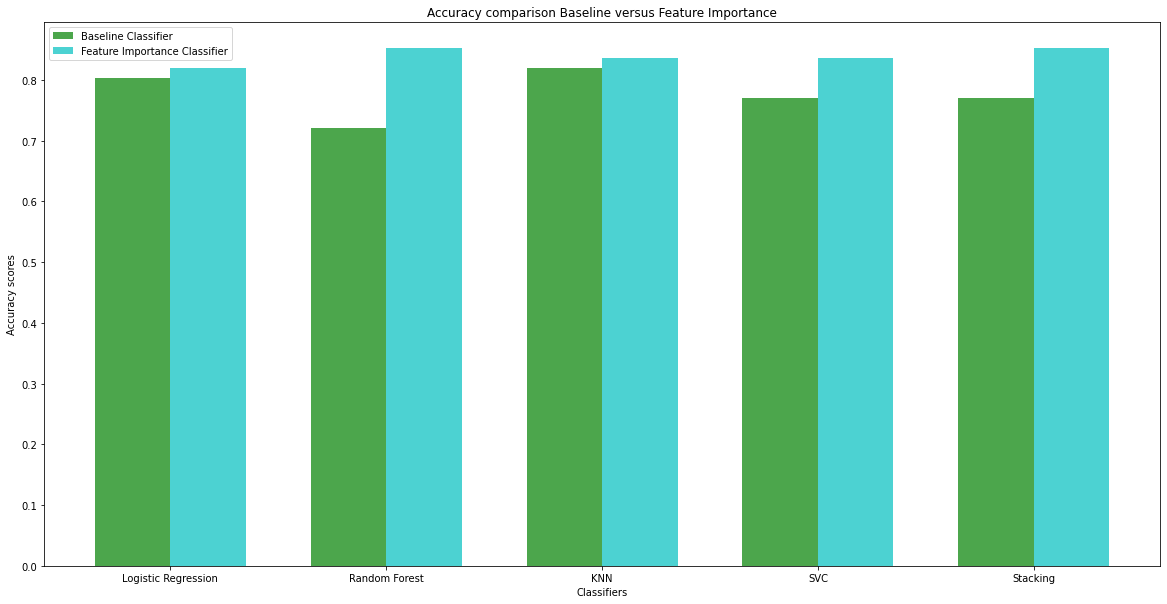

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
fig, ax = plt.subplots(figsize=(20,10))
n_groups = 5
index = np.arange(n_groups)
bar_width = 0.35
opacity = .7
error_config = {'ecolor': '0.3'}
normal_clf = ax.bar(index, names1, bar_width, alpha=opacity, color='g', label='Baseline Classifier')
bagging_clf = ax.bar(index + bar_width, names2, bar_width, alpha=opacity, color='c', label='Feature Importance Classifier')
ax.set_xlabel('Classifiers')
ax.set_ylabel('Accuracy scores')
ax.set_title('Accuracy comparison Baseline versus Feature Importance')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels((labels))
ax.legend()
#fig.tight_layout()
plt.show()

##### Visual of all accuracies in text form

In [ ]:
final_acc = accuracy + accuracy2
final_acc.sort()
for classifier in final_acc:
  print(classifier)


(0.7213114754098361, 'Random Forest Base')
(0.7704918032786885, 'SVC Base')
(0.7704918032786885, 'Stacking Base')
(0.8032786885245902, 'Logistic Regression Base')
(0.819672131147541, 'KNN Base')
(0.819672131147541, 'Logistic Regression with feature importance')
(0.8360655737704918, 'KNN with feature importance')
(0.8360655737704918, 'SVC with feature importance')
(0.8524590163934426, 'Random Forest with feature importance')
(0.8524590163934426, 'Stacking with feature importance')


# Conclusions

In this project, many different models were performed on the heart disease dataset to try and predict whether or not a patient had heart disease or not based on the predictor variables provided to us in the dataset. 

In this project we performed a total of 5 models on the data: Random Forest, Logistic Regression, KNN, SVC, and a stacking model using all four of these models and Logistic Regression as the meta classifier for the stacking model. 

We then ran these same 5 models on a new dataset that was made up of predictor variables that were selected through feature selection techniques as shown to be the most significant variables in the dataset. 


We then compared the accuracies and ROC Curves for all 5 models between the two datasets to determine which model performed the best and which dataset overall provided us with the highest accuracy scores as well as the lowest false negative rate. 

As we can see, the feature importance models out performed each of the same model type using the base dataset in all cases, and in most cases had much higher accuracies compared to the base version. 

This indicated that our feature selection technique was successful and that we were able to filter out the less useful predictor variables and instead create a dataset that has more relevant predictor variables that would help classify the presence of heart disease. 


Overrall, we can see that the SVC feature selection model was the best in terms of reducing the amount of false negatives present in the result. Although it scores around 2% lower in accuracy (83%) than both the Random Forest and Stacking feature selection models, this was an acceptable sacrifice to make to ensure that we were holding true to keeping the false negatives as low as possible.


Because of this, the SVC with feature selection was our best model and solved our business question in terms of being able to accurately predict whether or not someone has heart disease based on a range of symptoms, as well as making sure that false negatives are minimized as much as possible to avoide this horrible situation in the medical field. 

If we had more time and resources to perform this project again, we would try and over sample the amount of people present with heart disease in the dataset more than it already was so that our models would train to over classify people with having heart disease even if they don't have it, which in turn would lead to lower amounts of false negatives but would increase the amount of false postiives, which is exactly what we would like to have in a dataset working with disease and classification of that disease being present.